##Dataset
Cornell Sentence Polarity Dataset (published at ACL 2005). This data was first introduced by Bo Pang and Lillian Lee in a research paper titled “Seeing stars: Exploiting class relationships for sentiment categorization concerning rating scales.” (Published at ACL 2005) 

Author used the review snippets from the Rotten Tomatoes web pages. The ones marked as 'fresh' are assumed to be positive and those marked 'rotten' are assumed negative. 

##Project Task
Predict sentiment of each review snippet. Create and compare different models for accuracy score.

In [170]:
# Load the basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
from google.colab import drive
drive.mount('/content/drive')

# Reading the training data set
movie_reviews = pd.read_csv('drive/MyDrive/Colab Notebooks/train_file_kaggle.csv')
print(movie_reviews.shape)
movie_reviews

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(7463, 2)


,Reviews,Sentiments
0,"bittersweet comedy/drama full of life , hand g...",pos
1,you have to pay attention to follow all the st...,pos
2,"overall , interesting as a documentary -- but ...",pos
3,precocious smarter-than-thou wayward teen stru...,pos
4,nicolas philibert observes life inside a one-r...,pos
...,...,...
7458,the concept is a hoot . the trailer is a riot ...,neg
7459,as the movie traces mr . brown's athletic expl...,pos
7460,"may lack the pungent bite of its title , but i...",pos
7461,this romantic thriller is steeped in the atmos...,pos


In [172]:
movie_reviews["Reviews"][0]

'bittersweet comedy/drama full of life , hand gestures , and some really adorable italian guys . '

In [173]:
#check class imbalance
movie_reviews.Sentiments.value_counts()

pos    3754
neg    3709
Name: Sentiments, dtype: int64

### Data Pre-processing

In [174]:
# mapping labels to 0 and 1
movie_reviews['Sentiments'] = movie_reviews["Sentiments"].map({'pos':1, 'neg':0})

In [175]:
#verify
movie_reviews.head()

,Reviews,Sentiments
0,"bittersweet comedy/drama full of life , hand g...",1
1,you have to pay attention to follow all the st...,1
2,"overall , interesting as a documentary -- but ...",1
3,precocious smarter-than-thou wayward teen stru...,1
4,nicolas philibert observes life inside a one-r...,1


In [176]:
import nltk
#Tokenize and stopword removal
from nltk import TreebankWordTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

# Tokenization of text
tokenizer=TreebankWordTokenizer()

#Setting English stopwords
stopword_list= stopwords.words('english')
stopword_list.extend(['theyre', 'were', 'heis', 'im', 'ias', 'shouldve', 'arent', 'couldnt', 'didnt', 'doesnt', 're'])
#print(stopword_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [177]:
# Define function to remove stopwords
def remove_stopwords(text):
    tokens =  tokenizer.tokenize(text)
    #tokens = [token.strip() for token in tokens] 

    # Convert each token in tokens to lowercase and check if it is a stopword. If it is not a stopword, then add it to the filtered_tokens list
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)   
    return filtered_text

# Apply function on review column
movie_reviews['Reviews']= movie_reviews['Reviews'].apply(remove_stopwords)

movie_reviews['Reviews'][0]

'bittersweet comedy/drama full life , hand gestures , really adorable italian guys .'

In [178]:
'''import re
# Remove punctuation
movie_reviews['Reviews'] = movie_reviews['Reviews'].map(lambda x: re.sub("[,\.!/'?;:]", '', x))

# Convert the titles to lowercase
#movie_reviews['Reviews'] = movie_reviews['Reviews'].str.lower()

# Print out the first rows of papers
movie_reviews['Reviews'][1]'''

'import re\n# Remove punctuation\nmovie_reviews[\'Reviews\'] = movie_reviews[\'Reviews\'].map(lambda x: re.sub("[,\\.!/\'?;:]", \'\', x))\n\n# Convert the titles to lowercase\n#movie_reviews[\'Reviews\'] = movie_reviews[\'Reviews\'].str.lower()\n\n# Print out the first rows of papers\nmovie_reviews[\'Reviews\'][1]'

In [179]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
# Performing lemmatization
def simple_lemmatize(text):
    wnl=nltk.WordNetLemmatizer()
    text= ' '.join([wnl.lemmatize(word) for word in text.split()])
    return text
    
# Apply function on review column
movie_reviews['Reviews']=movie_reviews['Reviews'].apply(simple_lemmatize)

movie_reviews['Reviews'][1]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


"pay attention follow story , 're interesting . movie well shot tragic , one ponder credit roll ."

In [180]:
#create dependent and independent variables
X = movie_reviews.Reviews
y = movie_reviews.Sentiments
print(X.shape)
print(y.shape)

(7463,)
(7463,)


In [181]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [182]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features=3000, use_idf=True, ngram_range=(1,2))
vect.fit(X_train)

# vocab size
len(vect.vocabulary_.keys())

3000

In [183]:
# transforming the train and test datasets
X_train_transformed = vect.fit_transform(X_train)
X_test_transformed = vect.transform(X_test)

print(type(X_train_transformed))

<class 'scipy.sparse.csr.csr_matrix'>


###Supervised Machine-Learning Models

#### 1. Multinomial Naive Bayes Classifier

In [184]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

#Multinomial NB model
mnb = MultinomialNB().fit(X_train_transformed,y_train)

# predict
y_pred_train = mnb.predict(X_train_transformed)
y_pred_test = mnb.predict(X_test_transformed)

# predict probabilities
#y_pred_proba = mnb.predict_proba(X_test_transformed)

#accuracy score
mnb_train = round(metrics.accuracy_score(y_train, y_pred_train), 3)
mnb_test = round(metrics.accuracy_score(y_test, y_pred_test), 3)

print(f'Training: {mnb_train}')
print(f'Test: {mnb_test}')


Training: 0.86
Test: 0.728


#### 2. Bernoulli Naive Bayes Classifier 

In [185]:
from sklearn.naive_bayes import BernoulliNB

# Bernoulli NB model
bnb = BernoulliNB(alpha=1, binarize=False).fit(X_train_transformed,y_train)

# predict
y_pred_train = bnb.predict(X_train_transformed)
y_pred_test = bnb.predict(X_test_transformed)

# predict probability
#y_pred_proba =bnb.predict_proba(X_test_transformed)

# accuracy score
bnb_train = round(metrics.accuracy_score(y_train, y_pred_train), 3)
bnb_test = round(metrics.accuracy_score(y_test, y_pred_test), 3)

print(f'Training: {bnb_train}')
print(f'Test: {bnb_test}')

Training: 0.857
Test: 0.735


In [188]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred_test)

array([[527, 219],
       [177, 570]])

In [191]:
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_test))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_test))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_test))

PRECISION SCORE : 0.7224334600760456
RECALL SCORE : 0.7630522088353414
F1 SCORE : 0.7421875


####3. Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Logistic regression model
lr = LogisticRegression(penalty='none', solver='lbfgs', random_state=0, 
                                     max_iter=800).fit(X_train_transformed, y_train)


#predict
y_pred_train = lr.predict(X_train_transformed)
y_pred_test = lr.predict(X_test_transformed)

#accuracy score
lr_train = round(metrics.accuracy_score(y_train, y_pred_train), 3)
lr_test = round(metrics.accuracy_score(y_test, y_pred_test), 3)


print(f'Training: {lr_train}')
print(f'Test: {lr_test}') #high overfitting

Training: 0.998
Test: 0.684


####4. Logistic Regression - Hyperparameter Tuning (Lasso and Ridge)

In [141]:
#lasso model
C_list = np.arange(0.1,2,0.1)
lr_lasso = LogisticRegressionCV(Cs=C_list, penalty='l1', solver='liblinear', random_state=0,
                                max_iter=800).fit(X_train_transformed, y_train)

#predict
y_pred_train = lr_lasso.predict(X_train_transformed)
y_pred_test = lr_lasso.predict(X_test_transformed)

#accuracy
lr_lasso_train = round(metrics.accuracy_score(y_train, y_pred_train), 3)
lr_lasso_test = round(metrics.accuracy_score(y_test, y_pred_test), 3)


print(f'Training: {lr_lasso_train}')
print(f'Test: {lr_lasso_test}')

Training: 0.864
Test: 0.725


####5. Decision Tree Classifier

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Tree model object
dt = DecisionTreeClassifier(random_state = 0)

# range of the max_depth and criterion
param_grid = {'max_depth': np.arange(130, 150), 'criterion': ('gini', 'entropy')}

# grid search hyperparameter tuning
grid = GridSearchCV(dt, param_grid, cv = 3, scoring = 'accuracy', return_train_score = True, verbose = 1)
grid_search = grid.fit(X_train_transformed, y_train)

# optimal value of max_depth
print('The optimal value of max_depth is', grid_search.best_params_['max_depth'])
print('The optimal value of criterion is', grid_search.best_params_['criterion'])



#best decision tree model 
dt_best = DecisionTreeClassifier(random_state=0, max_depth=grid_search.best_params_['max_depth']).fit(X_train_transformed, y_train)

#predict
y_pred_train = dt_best.predict(X_train_transformed)
y_pred_test = dt_best.predict(X_test_transformed)

#accuracy score
dt_best_train = round(metrics.accuracy_score(y_train, y_pred_train), 3)
dt_best_test = round(metrics.accuracy_score(y_test, y_pred_test), 3)


print(f'Training: {dt_best_train}')
print(f'Test: {dt_best_test}')

Fitting 3 folds for each of 40 candidates, totalling 120 fits
The optimal value of max_depth is 147
The optimal value of criterion is gini
Training: 0.874
Test: 0.618


#### 6. Random Forest Classifier

In [143]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model object
rf = RandomForestClassifier(random_state = 0)

# range of the max_depth and n_estimator parameters
param_grid = {'max_depth': np.arange(36, 39, 1), 'n_estimators' : np.arange(400, 440, 10)} # Parameter range

# grid search hyperparameter tuning
grid = GridSearchCV(rf, param_grid, cv = 3, scoring = 'accuracy', return_train_score = True, verbose = 1)
grid_search = grid.fit(X_train_transformed, y_train)


#optimal value of max_depth and n_estimators
print('The optimal value of max_depth is', grid_search.best_params_['max_depth'])
print('The optimal value of n_estimator is', grid_search.best_params_['n_estimators'])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
The optimal value of max_depth is 37
The optimal value of n_estimator is 420


In [144]:
#best random forest model
rf_best = RandomForestClassifier(n_estimators = 420,
                            max_depth = 37, class_weight = 'balanced', 
                            random_state = 0).fit(X_train_transformed, y_train)

#predict
y_pred_train = rf_best.predict(X_train_transformed)
y_pred_test = rf_best.predict(X_test_transformed)

#accuracy
rf_best_train = round(metrics.accuracy_score(y_train, y_pred_train), 3)
rf_best_test = round(metrics.accuracy_score(y_test, y_pred_test), 3)


print(f'Training: {rf_best_train}')
print(f'Test: {rf_best_test}')

Training: 0.915
Test: 0.689


####7. XGBoost Classifier

In [145]:
import xgboost as xgb

# XGBoost model object
xg = xgb.XGBClassifier(class_weight = 'balanced', random_state = 0)

# parameter range for n_estimators and max_depth
param_grid = {'n_estimators': np.arange(780,810,10),
              'max_depth': np.arange(13,16)} # Parameter range

# grid search to find the best combination of hyperparameters
grid = GridSearchCV(xg, param_grid, cv=3, scoring='accuracy', return_train_score=True, verbose=1)
grid_search = grid.fit(X_train_transformed, y_train)

#optimal value of max_depth and n_estimators
print('The optimal value of criterion is', grid_search.best_params_['n_estimators'])
print('The optimal value of max_depth is', grid_search.best_params_['max_depth'])

Fitting 3 folds for each of 9 candidates, totalling 27 fits
The optimal value of criterion is 790
The optimal value of max_depth is 15


In [146]:
# best XGBoost model
xg_best = xgb.XGBClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                          learning_rate=0.01,
                          max_depth= grid_search.best_params_['max_depth'],
                          class_weight = 'balanced',
                          random_state = 123).fit(X_train_transformed, y_train)


#predict
y_pred_train = xg_best.predict(X_train_transformed)
y_pred_test = xg_best.predict(X_test_transformed)

#accuracy
xg_best_train = round(metrics.accuracy_score(y_train, y_pred_train), 3)
xg_best_test = round(metrics.accuracy_score(y_test, y_pred_test), 3)
print(f'Training: {xg_best_train}')
print(f'Test: {xg_best_test}')

Training: 0.844
Test: 0.675


#### Tabulating Accuracy across different models

In [147]:
# Tabulating our results for training and validation accuracy
pd.DataFrame([[mnb_train, mnb_test], [bnb_train, bnb_test], 
              [lr_train, lr_test], [lr_lasso_train, lr_lasso_test], [dt_best_train, dt_best_test], 
              [rf_best_train, rf_best_test], [xg_best_train, xg_best_test]], columns=['Training Acc', 'Validation Acc'], 
              index = ['Multinomial NB', 'Bernoulli NB', 'Log Reg', 'Log Reg Lasso', 'Decision Tree', 'Random Forest', 'XGBoost'])

,Training Acc,Validation Acc
Multinomial NB,0.860,0.728
Bernoulli NB,0.857,0.735
Log Reg,0.998,0.684
Log Reg Lasso,0.864,0.725
Decision Tree,0.874,0.618
Random Forest,0.915,0.689
XGBoost,0.844,0.675


### Deep Learning Model

In [148]:
# Import methods for building neural networks
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

# Import 'KerasClassifier' from 'keras' for connecting neural networks with 'sklearn' and 'GridSearchCV'
from keras.wrappers.scikit_learn import KerasClassifier

import os
import warnings
warnings.filterwarnings('ignore')

In [149]:
type(X_train_transformed)

scipy.sparse.csr.csr_matrix

In [150]:
# Converting the sparse matrix of a dataset obtained from count vectorization to a sparse tensor
#because keras accept sparse tensor as input, not a sparse matrix

#first convert the matrix to COO format. Then you extract the indices, values, and shape and pass those directly to the SparseTensor constructor.


def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape) #tf.sparse.SparseTensor(indices= ###, values=[,], dense_shape=[,])

In [151]:
# Sparse reordering is done because tensorflow accepts input in row-major format

# For the training dataset
X_train_nn = tf.sparse.reorder(convert_sparse_matrix_to_sparse_tensor(X_train_transformed))
y_train_nn = np.asarray(y_train)

# For the validation dataset
X_test_nn = tf.sparse.reorder(convert_sparse_matrix_to_sparse_tensor(X_test_transformed))
y_test_nn = np.asarray(y_test)

#### Fully-connected feedforward neural network

In [152]:
# Defining a fully-connected feedforward neural network
def create_nn(activation_function = 'relu',
              hidden1_neurons = 64):
  
    # keras.Input is the input layer of the neural network
    input = keras.Input(shape=(3000, ), sparse=True, name="tfidf_maxfeatures")

    # The first hidden layer
    hidden1 = layers.Dense(hidden1_neurons,
                           activation=activation_function)(input) 
    
    #pooling = layers.MaxPooling2D(pool_size=5, strides=1, padding='valid')

    #second hidden layer
    hidden2 = layers.Dense(32,
                           activation=activation_function)(hidden1)
                      

    # The output layer
    output = layers.Dense(1)(hidden2)

    return keras.Model(input, output)

In [153]:
#neural network model
nn1 = create_nn()
nn1.compile(loss = 'binary_crossentropy',
            metrics = ['accuracy'],
            optimizer = RMSprop(learning_rate = 0.01))

nn1.summary()

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tfidf_maxfeatures (InputLay  [(None, 3000)]           0         
 er)                                                             
                                                                 
 dense_75 (Dense)            (None, 64)                192064    
                                                                 
 dense_76 (Dense)            (None, 32)                2080      
                                                                 
 dense_77 (Dense)            (None, 1)                 33        
                                                                 
Total params: 194,177
Trainable params: 194,177
Non-trainable params: 0
_________________________________________________________________


In [154]:
# Training the neural network model on the dataset
nn1_history = nn1.fit(X_train_nn, y_train_nn, validation_data=(X_test_nn, y_test_nn), epochs = 10)

Epoch 1/10
187/187 [==============================] - 2s 5ms/step - loss: 0.7118 - accuracy: 0.6776 - val_loss: 0.8490 - val_accuracy: 0.7073
Epoch 2/10
187/187 [==============================] - 1s 4ms/step - loss: 0.5825 - accuracy: 0.8127 - val_loss: 1.1834 - val_accuracy: 0.7127
Epoch 3/10
187/187 [==============================] - 1s 4ms/step - loss: 0.4979 - accuracy: 0.8838 - val_loss: 1.5283 - val_accuracy: 0.7187
Epoch 4/10
187/187 [==============================] - 1s 4ms/step - loss: 0.4351 - accuracy: 0.9385 - val_loss: 2.4815 - val_accuracy: 0.7080
Epoch 5/10
187/187 [==============================] - 1s 4ms/step - loss: 0.3388 - accuracy: 0.9630 - val_loss: 3.1748 - val_accuracy: 0.7133
Epoch 6/10
187/187 [==============================] - 1s 5ms/step - loss: 0.3255 - accuracy: 0.9732 - val_loss: 3.6933 - val_accuracy: 0.6986
Epoch 7/10
187/187 [==============================] - 1s 4ms/step - loss: 0.3239 - accuracy: 0.9747 - val_loss: 3.7063 - val_accuracy: 0.7147
Epoch 

In [155]:
# Convert the neural network history object into a data frame to view its specifics
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

,loss,accuracy,val_loss,val_accuracy
epoch,,,,
1,0.711835,0.677554,0.848975,0.707301
2,0.582452,0.812730,1.183407,0.712659
3,0.497870,0.883752,1.528305,0.718687
4,0.435084,0.938526,2.481458,0.707970
5,0.338774,0.962982,3.174832,0.713329
6,0.325521,0.973199,3.693287,0.698593
7,0.323868,0.974707,3.706341,0.714668
8,0.319334,0.974707,3.707101,0.695244
9,0.299259,0.977387,3.873974,0.699933


In [156]:
# Compute the final accuracy of the model on the validation data set
performance_test = nn1.evaluate(X_test_nn, y_test_nn)

print('The loss value of the model on the validation data is {}'.format(performance_test[0]))
print('The accuracy of the model on the validation data is {}'.format(performance_test[1]))

47/47 [==============================] - 0s 2ms/step - loss: 3.9178 - accuracy: 0.6939
The loss value of the model on the validation data is 3.9177963733673096
The accuracy of the model on the validation data is 0.6939048767089844


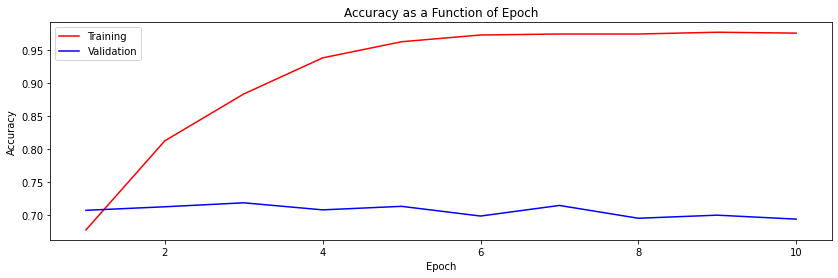

In [157]:
# plotting training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

#### Hyperparameter tuning for neural network

In [158]:
# hyperparameter tuning on activation functions and number of neurons
activation_function_list = ['sigmoid', 'relu']
hidden1_neurons_list = [128, 256]

# Create and train a neural network model for each value of learning rate
performance_df = pd.DataFrame(data = None)
hist = [None] * 4
indexcount = -1

for current_activation_function in activation_function_list:
    for current_hidden1_neurons in hidden1_neurons_list:
        indexcount = indexcount + 1
        
        # Create a neural network model using the 'create_nn' function
        nn = create_nn(activation_function = current_activation_function,
                      hidden1_neurons = current_hidden1_neurons)
        
        nn.compile(loss = 'binary_crossentropy',
                    metrics = ['accuracy'],
                    optimizer = RMSprop(learning_rate = 0.01))

        # Capture the training history of the model using the 'fit()' method

        print('\n activation_function = {},'.format(current_activation_function) + ' hidden1_neurons = {} - START \n'.format(current_hidden1_neurons))
        nn.summary()
        print('\n')
        nn_history = nn.fit(X_train_nn, y_train_nn, validation_data=(X_test_nn, y_test_nn), epochs = 5)
        print('\n activation_function = {},'.format(current_activation_function) + ' hidden1_neurons = {} - END \n'.format(current_hidden1_neurons))
        
        hist[indexcount] = pd.DataFrame(nn_history.history)
        hist[indexcount]['epoch'] = nn_history.epoch
        
        tempdf = pd.DataFrame(index = [indexcount],
                              data = {'Activation Function': current_activation_function,
                                      'First hidden layer neurons': current_hidden1_neurons,
                                      'Train Accuracy': hist[indexcount]['accuracy'][4],
                                      'Validation Accuracy': hist[indexcount]['val_accuracy'][4]})
        
        performance_df = pd.concat([performance_df, tempdf])

#print(performance_df)


 activation_function = sigmoid, hidden1_neurons = 128 - START 

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tfidf_maxfeatures (InputLay  [(None, 3000)]           0         
 er)                                                             
                                                                 
 dense_78 (Dense)            (None, 128)               384128    
                                                                 
 dense_79 (Dense)            (None, 32)                4128      
                                                                 
 dense_80 (Dense)            (None, 1)                 33        
                                                                 
Total params: 388,289
Trainable params: 388,289
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
187/187 [==============================] 

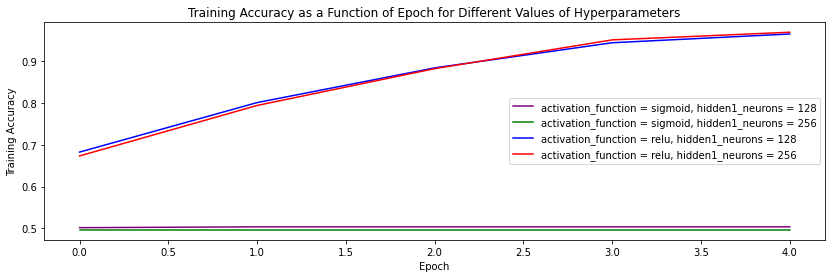

In [159]:
# training accuracies as functions of epochs for different values of learning rate
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_activation_function in activation_function_list:
    for current_hidden1_neurons in hidden1_neurons_list:
        indexcount = indexcount + 1
        sns.lineplot(data = hist[indexcount],
                    x = 'epoch',
                    y = 'accuracy',
                    color = colorlist[indexcount],
                    label = 'activation_function = ' + str(current_activation_function) + ', hidden1_neurons = ' + str(current_hidden1_neurons))

plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy as a Function of Epoch for Different Values of Hyperparameters');

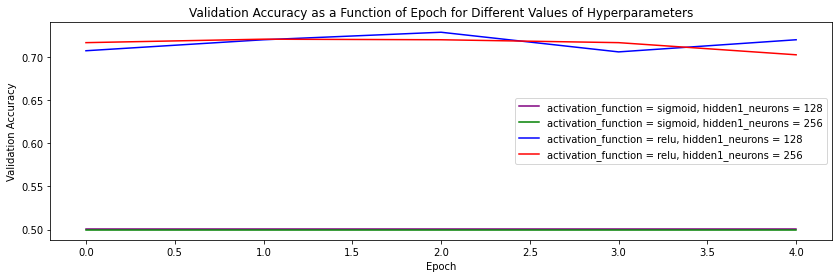

In [160]:
# testing accuracies as functions of epochs for different values of learning rate
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_activation_function in activation_function_list:
    for current_hidden1_neurons in hidden1_neurons_list:
        indexcount = indexcount + 1
        sns.lineplot(data = hist[indexcount],
                    x = 'epoch',
                    y = 'val_accuracy',
                    color = colorlist[indexcount],
                    label = 'activation_function = ' + str(current_activation_function) + ', hidden1_neurons = ' + str(current_hidden1_neurons))

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy as a Function of Epoch for Different Values of Hyperparameters');

In [161]:
# neural network with the optimal values of 'activation_function' and 'hidden1_neurons'

nn2 = create_nn(activation_function = 'relu', hidden1_neurons = 128)

nn2.compile(loss = 'binary_crossentropy',
            metrics = ['accuracy'],
            optimizer = RMSprop(learning_rate = 0.01))
nn2.summary()
print('\n')
nn2_history = nn2.fit(X_train_nn, y_train_nn, validation_data=(X_test_nn, y_test_nn), epochs = 5)


# final accuracy of the model on the validation data set
performance_test = nn2.evaluate(X_test_nn, y_test_nn)

print('The loss value of the model on the validation data is {}'.format(performance_test[0]))
print('The accuracy of the model on the validation data is {}'.format(performance_test[1]))

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tfidf_maxfeatures (InputLay  [(None, 3000)]           0         
 er)                                                             
                                                                 
 dense_90 (Dense)            (None, 128)               384128    
                                                                 
 dense_91 (Dense)            (None, 32)                4128      
                                                                 
 dense_92 (Dense)            (None, 1)                 33        
                                                                 
Total params: 388,289
Trainable params: 388,289
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
187/187 [==============================] - 2s 6ms/step - loss: 0.7029 - accuracy: 0.6794 - val_loss: 0.576

## Kaggle Submission

In [164]:
# Reading the test data set
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_file_kaggle.csv')
print(test.shape)
test.head()

(3199, 1)


,Reviews
0,the inhospitability of the land emphasizes the...
1,"see it now , before the inevitable hollywood r..."
2,"the weight of the piece , the unerring profess..."
3,the large-frame imax camera lends itself beaut...
4,"what makes how i killed my father compelling ,..."


In [165]:
#remove stopwords
test['Reviews'] = test['Reviews'].apply(remove_stopwords)
# Lemmatization
test['Reviews'] = test['Reviews'].apply(simple_lemmatize)

In [166]:
# Tfidf vectorizer
test_reviews=list(test['Reviews'])

# transformed test reviews
X_test_transformed = vect.transform(test_reviews)

print('Tfidf_test:', X_test_transformed.shape)

Tfidf_test: (3199, 3000)


### Best model: Bernoulli Naive Bayes

In [167]:
# predictions on the prepared test data set using the best validation accuracy model 
y_pred_test = bnb.predict(X_test_transformed)
print("prediction shape:", y_pred_test.shape)

y_classes = (y_pred_test > 0.5).astype(int)
y_classes

prediction shape: (3199,)


array([1, 0, 1, ..., 0, 1, 1])

In [168]:
submit = pd.DataFrame(y_classes, columns=['Category'])
submit.index.name = 'Id'

In [169]:
submit.to_csv("test_file_kaggle_log_submission.csv", header=True, index=True)